**Макаова Мария. Дз**

**№1, 2**

**1. Импорт библиотеки math:**

In [89]:
import math

**2. Создание класса Vector (№1)**

In [90]:
class Vector:
    __slots__ = ['x', 'y']
    """вектор"""
    def __init__(self, x, y):
        self.x = x
        self.y = y
        print(x, y)

    def __add__(self, other):
        x1 = self.x + other.x
        y1 = self.y + other.y
        return Vector(x1, y1)

    def __sub__(self, other):
        x1 = self.x - other.x
        y1 = self.y - other.y
        return Vector(x1, y1)

    def __mul__(self, const):
        x1 = const * self.x
        y1 = const * self.y
        return Vector(x1, y1)

    def __bool__(self):
        return self.x != 0 or self.y != 0

    def __abs__(self):
        res = math.sqrt(self.x ** 2 + self.y ** 2)
        return res

    def angle(self):
        return math.atan2(self.y, self.x)

    def __hash__(self):
        return hash((self.x, self.y))

    def __eq__(self, other):
        return self.x == other.x and self.y == other.y

    def __ne__(self, other):
        return self.x != other.x or self.y != other.y

    def __lt__(self, other):
        return abs(self) < abs(other)

    def __gt__(self, other):
        return abs(self) > abs(other)

    def __le__(self, other):
        return abs(self) <= abs(other)

    def __ge__(self, other):
        return abs(self) >= abs(other)

    def __iter__(self):
        yield from (self.x, self.y)

**3. Тренеровочные тесты для класса Vector:**

In [91]:
x = int(input('введите x: '))
y = int(input('введите y: '))
v = Vector(x, y)
x1 = int(input('введите x1: '))
y1 = int(input('введите y1: '))
v1 = Vector(x1, y1)
print('угол v: ', v.angle())
print('хэш v: ', hash(v))
print('угол v1: ', v1.angle())
print('хэш v1: ', hash(v1))
print("равенство: ", v == v1)
print('неравенство: ', v != v1)
print('больше или нет: ', v < v1)
print('меньше или нет: ', v > v1)
print('меньше либо равно или нет: ', v <= v)
print('больше либо равно или нет: ', v >= v)
print('длина v', abs(v))
print('длина v1', abs(v1))
print('координаты v: ')
for i in v:
    print(i)
print('координаты v1: ')
for i in v1:
    print(i)

введите x: 1
введите y: 2
1 2
введите x1: 3
введите y1: 4
3 4
угол v:  1.1071487177940904
хэш v:  -3550055125485641917
угол v1:  0.9272952180016122
хэш v1:  1079245023883434373
равенство:  False
неравенство:  True
больше или нет:  True
меньше или нет:  False
меньше либо равно или нет:  True
больше либо равно или нет:  True
длина v 2.23606797749979
длина v1 5.0
координаты v: 
1
2
координаты v1: 
3
4


**4. Создание класса NormalizedVector с использованием Vector(№2):**

In [92]:
class NormalizedVector(Vector):
    def __init__(self, x, y):
        lenght = math.sqrt(x ** 2 + y ** 2)
        if lenght == 0:
            super().__init__(0, 0)
        else:
            x_norm = x / lenght
            y_norm = y / lenght
            super().__init__(x_norm, y_norm)
    def __add__(self, other):
        result = super().__add__(other)
        return Vector(result.x, result.y)

    def __mul__(self, other):
        result = super().__mul__(other)
        return Vector(result.x, result.y)

    @staticmethod
    def from_angle(n):
        x = math.cos(n)
        y = math.sin(n)
        return NormalizedVector(x, y)

**5. Тесты для класса NormalizedVector:**

In [93]:
x3 = int(input('введите x3: '))
y3 = int(input('введите y3: '))
x4 = int(input('введите x4: '))
y4 = int(input('введите y4: '))
nv1 = NormalizedVector(x3, y3)
nv2 = NormalizedVector(x4, y4)
print('нормированный вектор nv1: ', nv1)
print('сумма нормированных векторов: (nv1 + nv2): ', nv1 + nv2)
print('экземпляр из угла в радианах: ', NormalizedVector.from_angle(0.982793723247329))

введите x3: 5
введите y3: 6
введите x4: 7
введите y4: 8
0.6401843996644799 0.7682212795973759
0.658504607868518 0.7525766947068778
нормированный вектор nv1:  <__main__.NormalizedVector object at 0x7d6d32517f10>
1.298689007532998 1.5207979743042537
1.298689007532998 1.5207979743042537
сумма нормированных векторов: (nv1 + nv2):  <__main__.Vector object at 0x7d6d2ac08910>
0.5547001962252291 0.8320502943378437
экземпляр из угла в радианах:  <__main__.NormalizedVector object at 0x7d6d32517590>


**Вторая часть (№3-4)**

**1. Импорт необходимых библиотек:**

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io
import os

**2. Настройка графиков:**

In [97]:
%matplotlib inline
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

**3. Загрузка файлов с Kaggle.** Я использую датасет Iris Species. Я скачала его в виде зип архива, затем рапаковала. В ниже преведенном фрагменте загружаю его в ноутбук:

In [98]:

df = pd.read_csv('/content/drive/MyDrive/Iris.csv')

**4. Найдем уникольные виды ирисов в датасете**. Так же посмотрим первые 5 строк, чтобы понять, какие признаки у нас есть:

In [99]:
print("Уникальные виды ирисов:")
print(df['Species'].unique())
print("Первые 5 строк данных:")
display(df.head(5))

Уникальные виды ирисов:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']
Первые 5 строк данных:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


так, распишем, что мы видем в этих ячейках:
1. Идентификатор
2. Длину чашелистика в см
3. Ширину чашелистика в см
4. Длину лепестка в см
5. Ширину лепестка в см
6. Вид ириса


**5. Посмотрим общую информацию про типы данных и пропуски:**

In [100]:
print("\nОбщая информация (типы данных и пропуски):")
df.info()


Общая информация (типы данных и пропуски):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Обратим внимание, что все ячейки заполнены, поэтому не нужно заполнять пропуски и можно перейти сразу к анализу данных

**6. Посмотрим на числовые значения в переменных. В данном случае это измерение цветков ириса в см:**

In [101]:
print("\nДосье на числовые признаки:")
display(df.describe())


Досье на числовые признаки:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Проанализируем полученные значения, а именно медиану и среднее значение в каждом столбце:
*  В столбцах `SepalLengthCm` и `SepalWidthCm`	**медиана < среднего арифметического**, но так как разница между ними не такая большая, то будет небольшой сдвиг вправо, но в целом это не существенно (размеры чашелистников чучуть большие)

* В столбцах `PetalLengthCm` и	`PetalWidthCm` **медиана > среднего арифметического**. В отличие от прошлого пунтка, разница между медианой и средним значением достаточно большая. Это значит, что есть очень маленькие лепестки (так как средняя ширина и длина меньше чем медиана). Выброрсы влево






**7. Рассмотрим каждый признак по отдельности:**

**`Длина чашелистиков`**




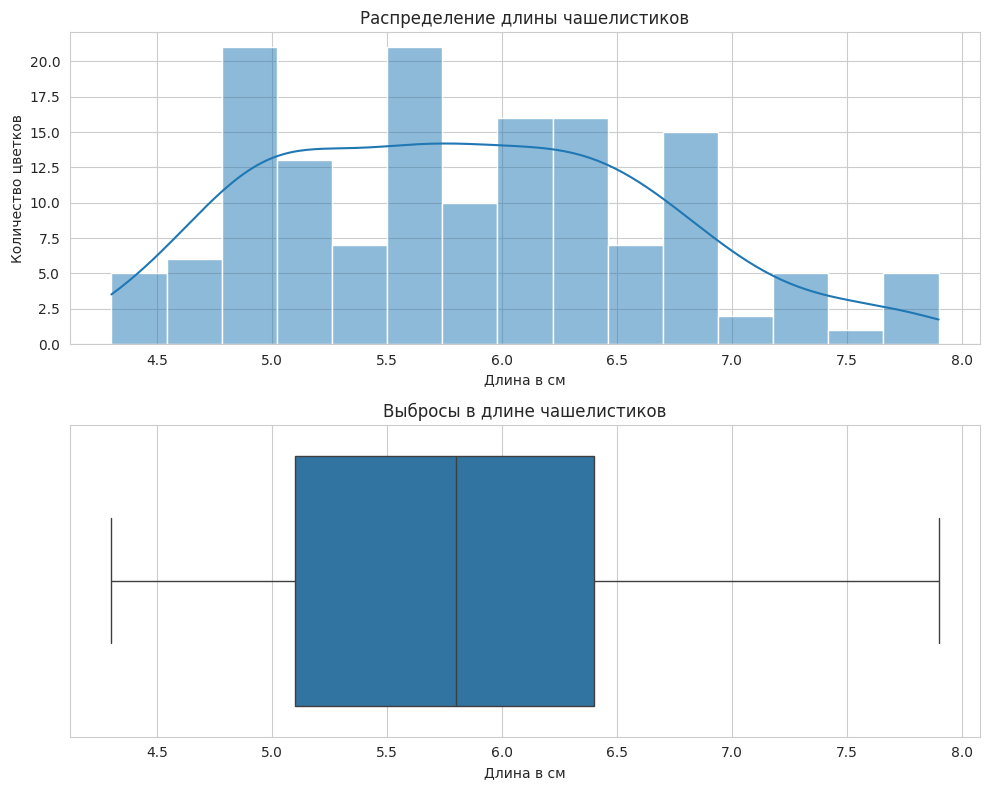

In [102]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
#Гистограмма
sns.histplot(df['SepalLengthCm'], kde=True, ax=axes[0], bins=15)
axes[0].set_title('Распределение длины чашелистиков')
axes[0].set_xlabel('Длина в см')
axes[0].set_ylabel('Количество цветков')

#Boxplot
sns.boxplot(x=df['SepalLengthCm'], ax=axes[1])
axes[1].set_title('Выбросы в длине чашелистиков')
axes[1].set_xlabel('Длина в см')
plt.tight_layout()
plt.show()

обратим внимание, что у нас очень сильный разброс данных. отсюда делаем вывод что нельзя однозначно распределить на группы по этмоу признаку ирисы.
Выбросов на втором графике мы тоже не наблюдаем



**`Ширина чашелистиков:`**

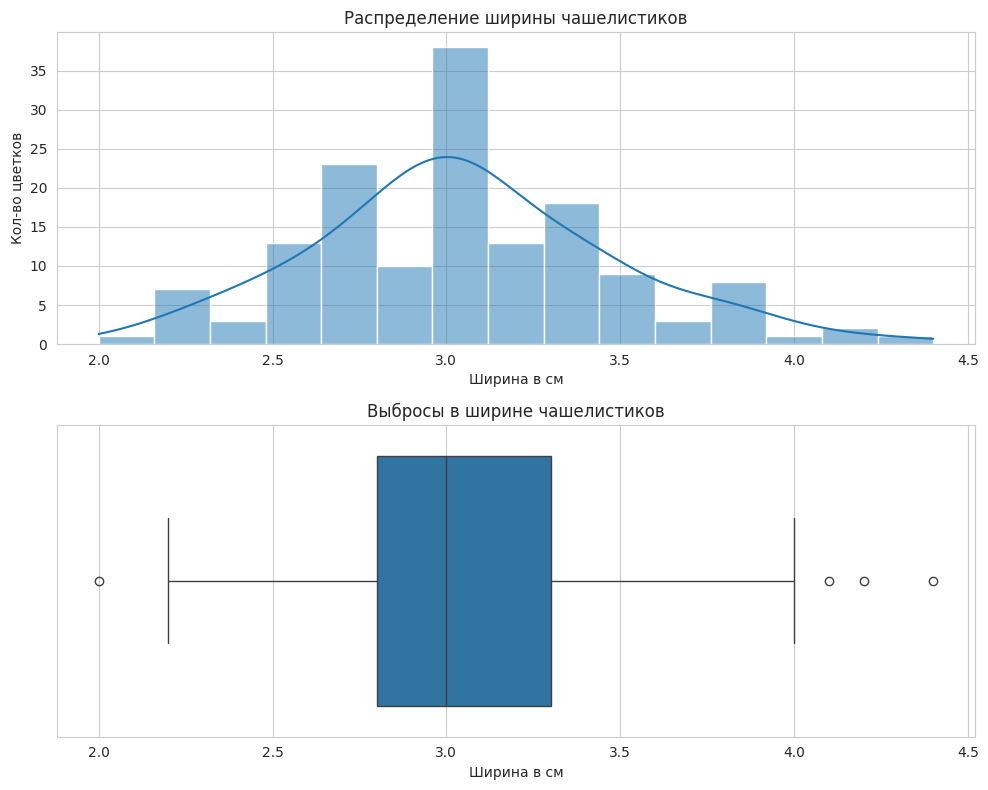

In [103]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(df['SepalWidthCm'], kde=True, ax=axes[0], bins=15)
axes[0].set_title('Распределение ширины чашелистиков')
axes[0].set_xlabel('Ширина в см')
axes[0].set_ylabel('Кол-во цветков')

sns.boxplot(x=df['SepalWidthCm'], ax=axes[1])
axes[1].set_title('Выбросы в ширине чашелистиков')
axes[1].set_xlabel('Ширина в см')
plt.tight_layout()
plt.show()

обратим внимание, что основной пик приходится на ширину в 3 см. В остальном мы наблюдаем сильные провалы по бокам
Это значит что нет четкого разделения на группы, скорее всего  ширина чашелистиков в большей степени подвержена влиянию факторов внешней среды и индивидуальной изменчивости, нежели является строгим видовым признаком.
Так же стоит отметить, что на втором графике мы можем наблюдать выбросы слева и справа. Во-втором случае, мы можем сказать, что скорее это аномалия, чем какой-то отдельный вид, просто несколько цветов с очень широкими чашелистиками

**`Длина лепестков:`**

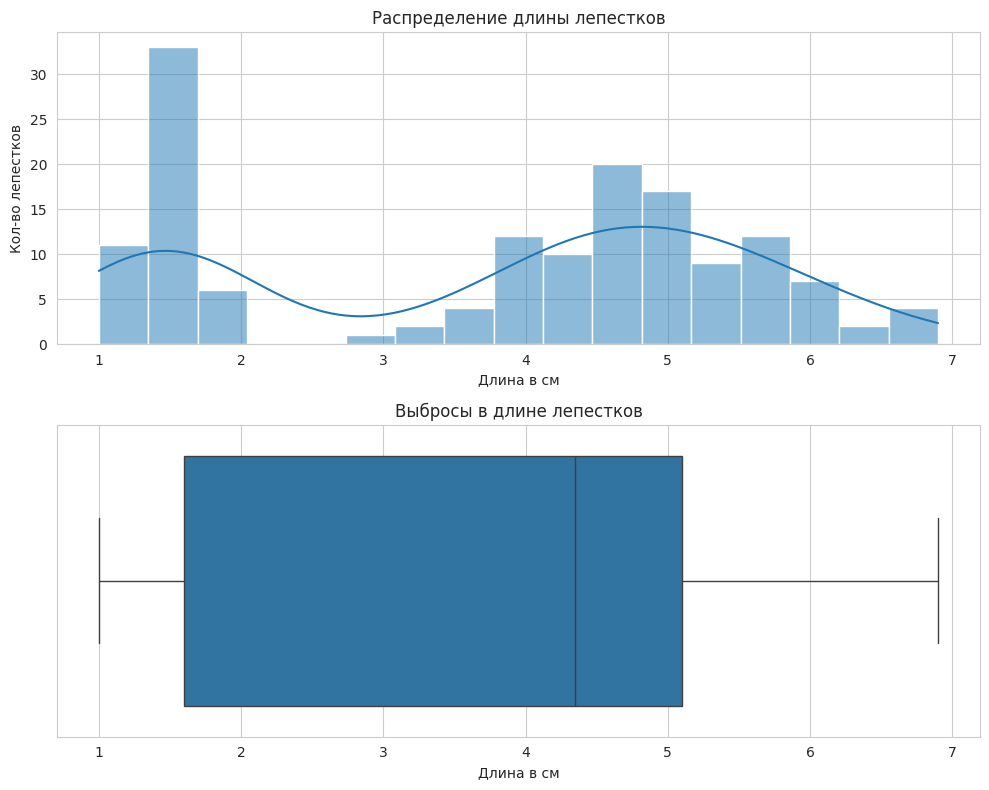

In [104]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(df['PetalLengthCm'], kde=True, ax=axes[0], bins=17)
axes[0].set_title('Распределение длины лепестков')
axes[0].set_xlabel('Длина в см')
axes[0].set_ylabel('Кол-во лепестков')

sns.boxplot(x=df['PetalLengthCm'], ax=axes[1])
axes[1].set_title('Выбросы в длине лепестков')
axes[1].set_xlabel('Длина в см')
plt.tight_layout()
plt.show()

Вот тут ситуация интереснее. Можно заметить, что пик приходится на очень маленькие лепестки (1,5-1,9 см)
Затем, мы наблюдаем отдельную группу, где нет ирисов с лепестками в 2-3 см и еще одну группу, где наблюдается второй пик - 4-5 см.
Отсутствие выбросов подтверждает, что мы наблюдаем не аномалии, а три различных вида ирисов с характерными размерами лепестков.

**`Ширина лепестков:`**

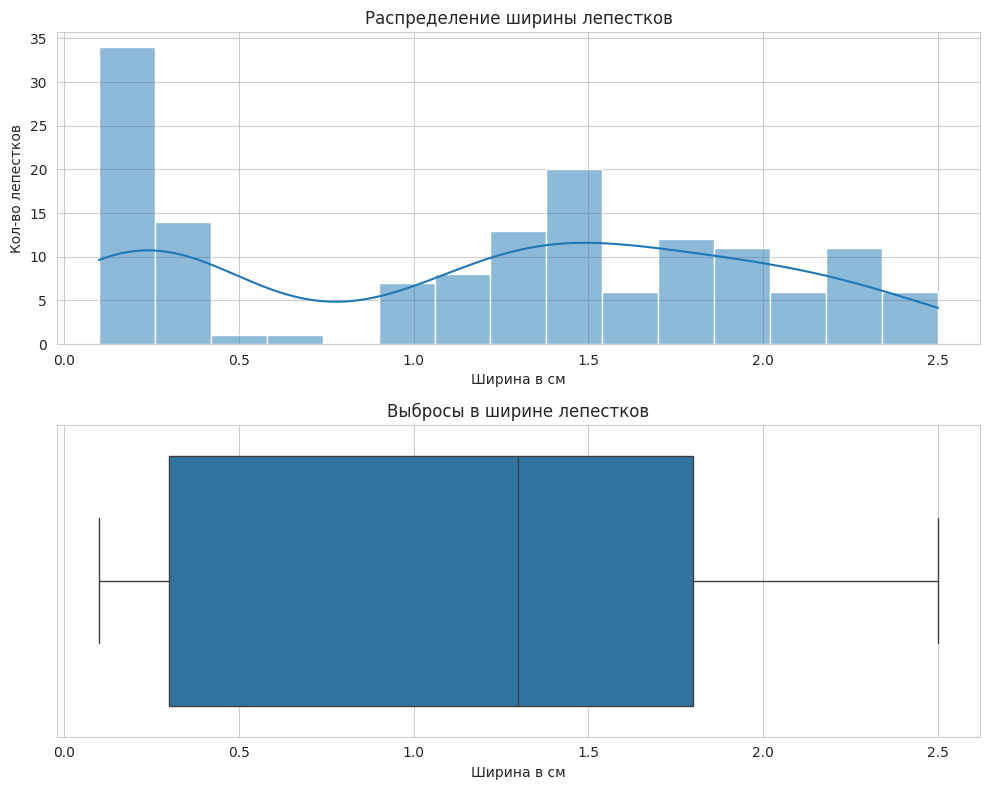

In [105]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
sns.histplot(df['PetalWidthCm'], kde=True, ax=axes[0], bins=15)
axes[0].set_title('Распределение ширины лепестков')
axes[0].set_xlabel('Ширина в см')
axes[0].set_ylabel('Кол-во лепестков')

sns.boxplot(x=df['PetalWidthCm'], ax=axes[1])
axes[1].set_title('Выбросы в ширине лепестков')
axes[1].set_xlabel('Ширина в см')
plt.tight_layout()
plt.show()

Здесь тоже есть за что зацепиться. Заметим, что на первом графике пик приходится на ширину от 0 до 0,5 см.
Отсюда выделяем группу с очень маленькой шириной лепестков.
так же отметим, что отсутствие значений в диапазоне 0,7-1,0 см создает естественный разрыв между первой и второй группами, что дополнительно подтверждает их видовую обособленность.
Второй пик приходится на ширину от 1 до 1,5 - это и будет вторая группа.
далее достаточно ровно идет число цветков чья ширина находится в интервале от 1,7 до 2,5 см.
так как выбросов тоже нет мы получаес три группы


**8. Поиск связей (влияние признаков друг на друга):**

**`Категория vs цель (виды ирисов):`**

/tmp/ipython-input-48150664.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])
/tmp/ipython-input-48150664.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])
/tmp/ipython-input-48150664.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])
/tmp/ipython-input-48150664.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])


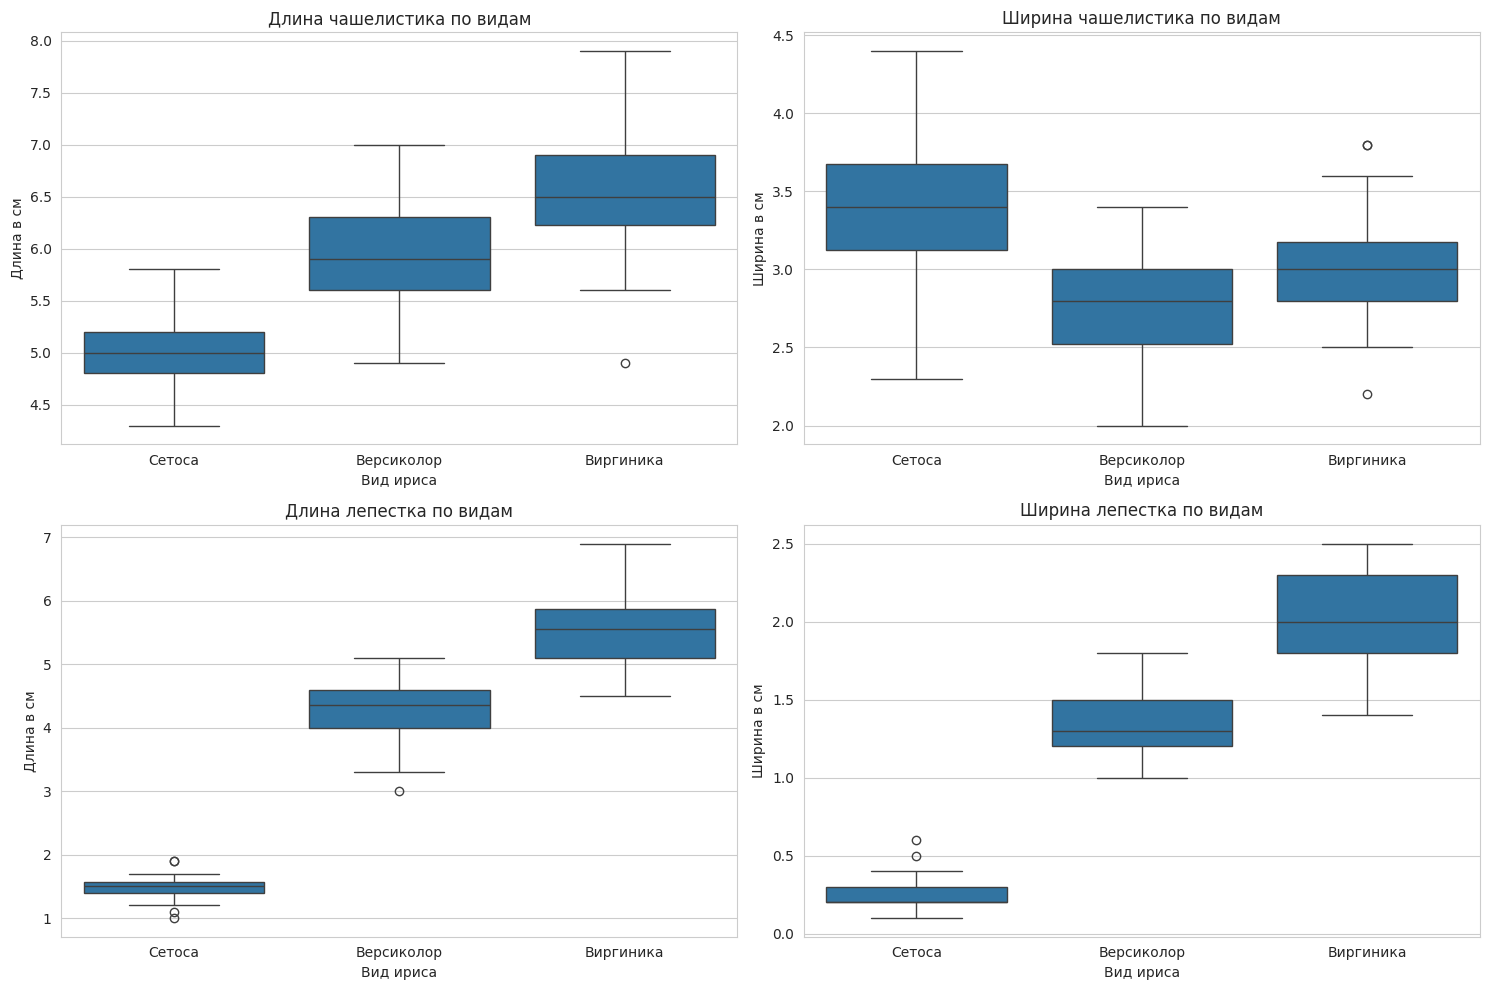

In [106]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.boxplot(x='Species', y='SepalLengthCm', data=df, ax=axes[0,0])
axes[0,0].set_title('Длина чашелистика по видам')
axes[0,0].set_xlabel('Вид ириса')
axes[0,0].set_ylabel('Длина в см')
axes[0,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

sns.boxplot(x='Species', y='SepalWidthCm', data=df, ax=axes[0,1])
axes[0,1].set_title('Ширина чашелистика по видам')
axes[0,1].set_xlabel('Вид ириса')
axes[0,1].set_ylabel('Ширина в см')
axes[0,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

sns.boxplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1,0])
axes[1,0].set_title('Длина лепестка по видам')
axes[1,0].set_xlabel('Вид ириса')
axes[1,0].set_ylabel('Длина в см')
axes[1,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

sns.boxplot(x='Species', y='PetalWidthCm', data=df, ax=axes[1,1])
axes[1,1].set_title('Ширина лепестка по видам')
axes[1,1].set_xlabel('Вид ириса')
axes[1,1].set_ylabel('Ширина в см')
axes[1,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

plt.tight_layout()
plt.show()

Проанализируем графики:

**1. Виды по длине чашелистиков:**
* `Медианы`: можно записать в виде такого неравенства: сетоса < версиколор < виргиника. Отсюда делаем вывод, что виргиника имеет самые длинные чашелистики.
* `Ящики` (от узкого к широкому): можно записать в виде такого неравенства сетоса < версиколор < виргиника. Следовательно, сетоса имеет наименьшую вариацию, а виргиника - наибольшую.
*  `Усы`: нет перекрытий между группами, следовательно виды четко разделяются по длине чашелистиков

**2. Виды по ширине чашелистиков:**
*  `Медианы`: можно записать в виде такого неравенства: версиколор < виргиника < сетоса. Отсюда делаем вывод, что сетоса имеет наибольшую ширину чашелистиков.
*  `Ящики` (от узкого к широкому): виргиника < версиколор < сетоса. Сдедовательно, виргиника имеет наименьшую вариацию, а сетоса - наибольшую.
*  `Усы`: нет перекрытий между группами, следовательно виды четко разделяются по ширине чашелистиков

**3. Виды по длине лепестков:**
*  `Медианы`: можно записать в виде такого неравенства: виргиника > версиколор > сетоса. следовательно виргиника имеет самые длинные лепестки
*  `Ящики`(от узкого к широкому): виргиника > версиколор > сетоса. следовательно у сетоса мало вариаций, а у виргиники много
*  `Усы`: нет перекрытий между группами. Вывод: Виды четко разделяются по длине лепестка

                                        АНАЛИЗ ВЫБРОСОВ
1. `Сетоса`: лепестки этого вида имеют очень большое разнообразие. судя по выбросам на последних двух графиках, это вид с наиболее различными лепестками.
2. `Версиколор`: в этом же виде мы наблюдаем лишь один выброс в длине лепестков. Отсюда делаем вывод, что параметры данного вида достаточно стабильны.
3. `Виргиника`: у этого вида имеется три выброса по чашелистикам. отсюда делаем вывод что данный вид обладает наибольшем разнообразием чашелистиков

Общий вывод: у разных видов свои уникальные параметры и своя изменчивость. Наиболее стабильным видом с точки зрения изменчивости является версиколор.















**`Число vs цель (виды ирисов):`**

/tmp/ipython-input-705406022.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])
/tmp/ipython-input-705406022.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])
/tmp/ipython-input-705406022.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])
/tmp/ipython-input-705406022.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])


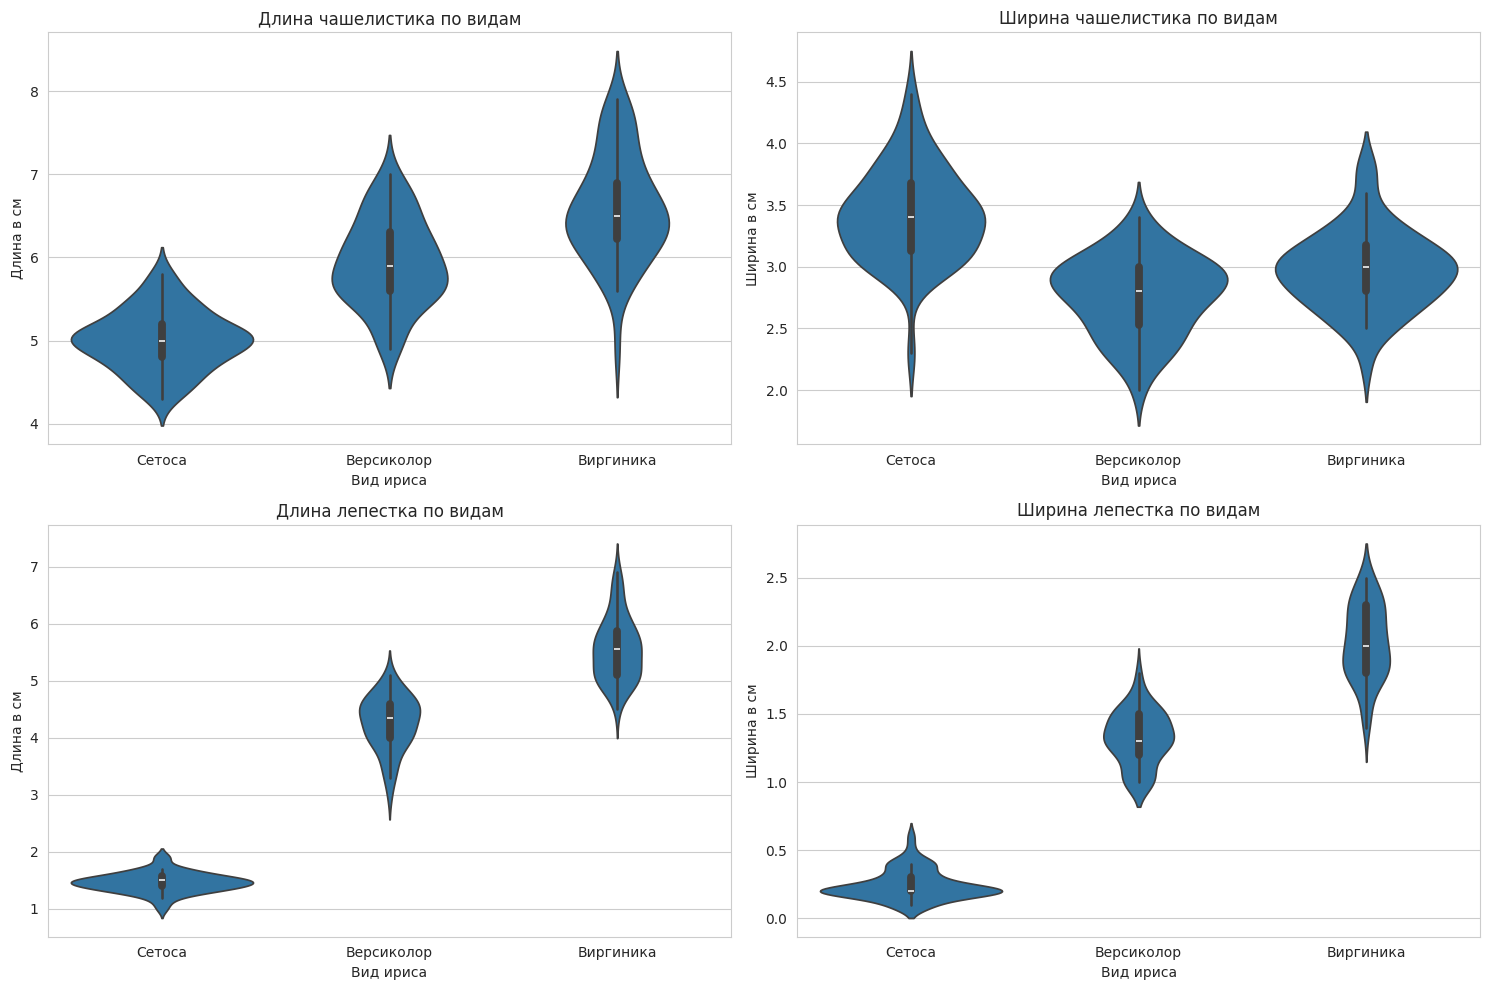

In [107]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.violinplot(x='Species', y='SepalLengthCm', data=df, ax=axes[0,0])
axes[0,0].set_title('Длина чашелистика по видам')
axes[0,0].set_xlabel('Вид ириса')
axes[0,0].set_ylabel('Длина в см')
axes[0,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

sns.violinplot(x='Species', y='SepalWidthCm', data=df, ax=axes[0,1])
axes[0,1].set_title('Ширина чашелистика по видам')
axes[0,1].set_xlabel('Вид ириса')
axes[0,1].set_ylabel('Ширина в см')
axes[0,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

sns.violinplot(x='Species', y='PetalLengthCm', data=df, ax=axes[1,0])
axes[1,0].set_title('Длина лепестка по видам')
axes[1,0].set_xlabel('Вид ириса')
axes[1,0].set_ylabel('Длина в см')
axes[1,0].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

sns.violinplot(x='Species', y='PetalWidthCm', data=df, ax=axes[1,1])
axes[1,1].set_title('Ширина лепестка по видам')
axes[1,1].set_xlabel('Вид ириса')
axes[1,1].set_ylabel('Ширина в см')
axes[1,1].set_xticklabels(['Сетоса', 'Версиколор', 'Виргиника'])

plt.tight_layout()
plt.show()

Проанализируем полученные графики:
1. Длина чашелистиков по видам:
* `Сетоса`: длина чашелистиков достаточно маленькая, в районе 4,5 - 5 см. Отсюда делаем вывод, что у этого вида самые маленькие чашелистики
* `Виргиника`: здесь мы можем наблюдать смещение у скрипки вверх (по числам - вправо). Длина чашелистиков от 6 до 7-8 см. Отсюда делаем вывод, что у этого вида самые длинные чашелистики
* `Версиколор`: средняя длина этого вида около 5,5 - 6 см. На фоне предыдущих можно предположить, что длина чашелистиков средняя.
2. Ширина чашелистиков по видам:
* `Сетоса`: тут наблюдаем явное смещение вверх, средняя ширина в диапазоне от 3 до 4 см. Отсюда делаем вывод, что у этого вида наиболее широкии чашелистики.
*  `Версиколор`: здесь явно уклон вниз, ширина наименьшая (от 2,5 до 3 см). скорее всего данный вид имеет самые узкие чашелистики.
* `Виргиника`: он как и версиколор имеет схожую ширину чашелистиков, но мне кажется все-таки немного большую ширину. отнесем размеры чашелистиков этого вида к средним.
3. Длина лепестков по виду:
* `Сетоса`: вот тут интереснее. У сетосы длина лепестков явно считается сильным видовым признаков. Большьшая часть этого вида имеет очень маленькие лепестки (1,5 см).
*  `Версиколор`: этот же вид имеет стандартную вариабельность. в основном диапазон от 4 до 5 см
* `Виргиника`: этот вид имеет очень большую длину лепестков (от 4,5 до 6,5 см).
Это уже более разнообразная группа.
4. Ширина лепестков по виду:
* `Сетоса`: у этого вида оочень узкие лепестки (ширина 0,3 см примерно).
*  `Версиколор`: у версиколора ширина стабильна, средних размеров (1 - 1,5 см)
* `Виргиника`: лепестки оочень широкие и развитые (ширина от 1,5 до 2,5 см)


Общий вывод: эти признаки, как и предполагалось, оказались ключевыми параметрами для разделения на виды. особую роль в этом сыграли лепестки


**`Матрица корреляций`** связь признаков друг с другом:

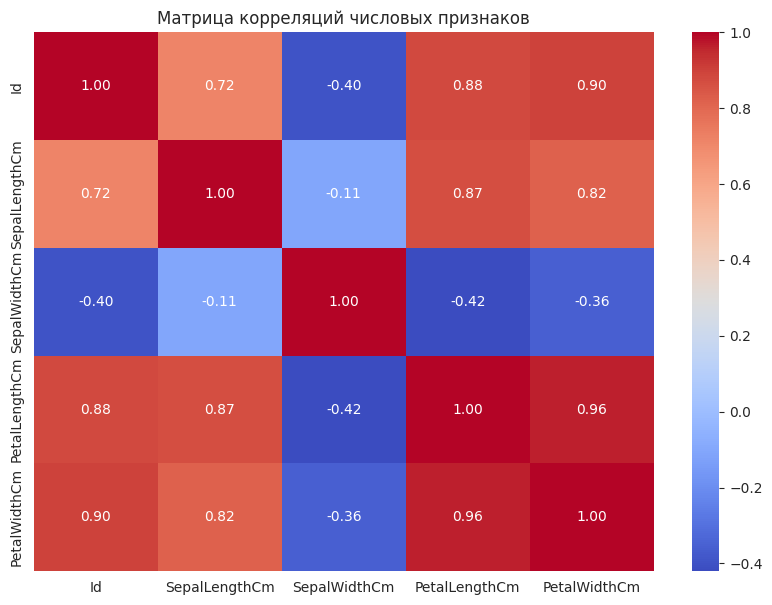

In [108]:
numeric_cols = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 7))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Матрица корреляций числовых признаков')
plt.show()

Рассмотрим наиболее сильные связи:
* длина чашелистика и длина лепестка - сильная прямая
* длина чашелистика и ширина лепестка - сильная прямая


отсюда делаем вывод, что длина чашелистика предсказывает размеры лепестка.

* ширина чашелистика и длина лепестка - умеренная прямая связь
* ширина чашелистика и ширина лепестка - умеренная прямая

скорее всего общие черты есть, но много различий.

* длина лепестка и ширина лепестка - очень сильная прямая связь! следовательно, рост лепестков полностью пропорционален (длина прямопропорциональна ширине).


У остальных параметров друг с другом слабая связь



**9. Снижение размерности:**

Прежде чем перехожить к написанию кода стоит отметить, что переменная Species является не бинарной, а категориальной (как embarked в титанике). поэтому используем только тот метод кодирования, который использовался для embarked

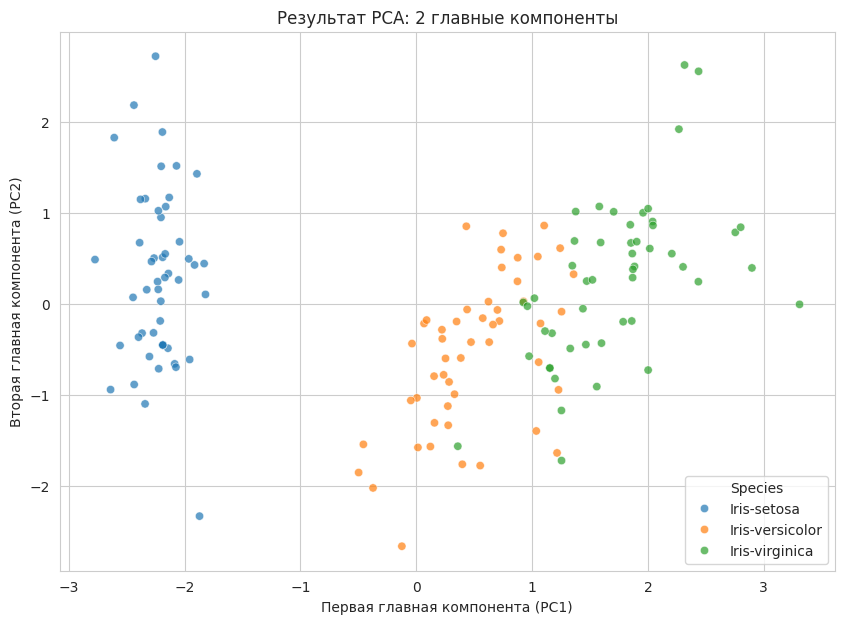

In [109]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

pca_df = pd.DataFrame(data=features_pca, columns=['PC1', 'PC2'])
pca_df['Species'] = df['Species']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PC1', y='PC2', hue='Species', data=pca_df, alpha=0.7)
plt.title('Результат PCA: 2 главные компоненты')
plt.xlabel('Первая главная компонента (PC1)')
plt.ylabel('Вторая главная компонента (PC2)')
plt.show()

Вывод: график показывает четкое разделение ирисов на три вида

**10. Визуализация**. Для наглядности используем t-SNE:

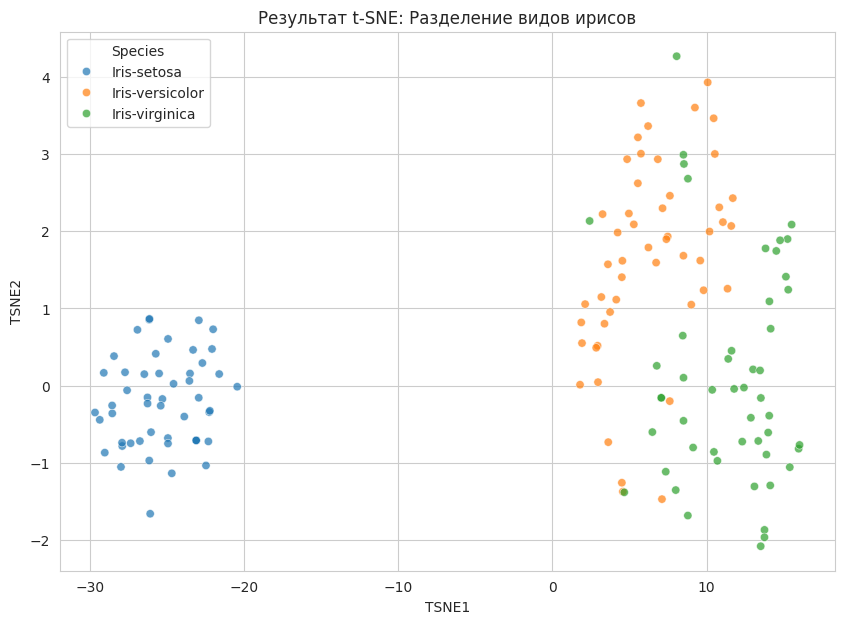

In [110]:
from sklearn.manifold import TSNE
pca_10 = PCA(n_components=min(10, features_scaled.shape[1]))
features_pca_10 = pca_10.fit_transform(features_scaled)

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_pca_10)

tsne_df = pd.DataFrame(data=features_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['Species'] = df['Species']

plt.figure(figsize=(10, 7))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Species', data=tsne_df, alpha=0.7)
plt.title('Результат t-SNE: Разделение видов ирисов')
plt.show()

**11. Уборка данных**

Поскольку в самом начале мы не обнаружили пропусков (проверка с df.info()), то нам не нужно делать заполнение пропусков как в примере. Перейдем к следующим шагам.

**`Оцифровка данных`**:

In [111]:
df = pd.get_dummies(df, columns=['Species'], drop_first=True)
print("\nДанные после кодирования:")
display(df.head())


Данные после кодирования:


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_Iris-versicolor,Species_Iris-virginica
0,1,5.1,3.5,1.4,0.2,False,False
1,2,4.9,3.0,1.4,0.2,False,False
2,3,4.7,3.2,1.3,0.2,False,False
3,4,4.6,3.1,1.5,0.2,False,False
4,5,5.0,3.6,1.4,0.2,False,False


**12. ВЫВОДЫ И ИТОГИ:**

1. При проведении EDA я убедилась, что в данных нет пропусков, изучили значимость признаков (например, что лепестки значительно существеннее оказывают влияние на вид), обнаружили чёткие разрывы в распределениях длин и ширин лепестков, выявили стабильность признаков и четкие виды ирисов. наглядно показали все на графиках
2. Проведя DP я удалила мусор и оцифровала данные
3. Проведя DR я сжала все признаки в 2 компоненты (PCA) и увидела, что дейтсвительно, можно выделить три четких вида ирисов с характерными признаками.
Теперь эти чистые, понятные данные готовы для передачи в Модель Машинного Обучения, которая научится на них предсказывать вид ириса.